In [1]:
# mounts google colab to drives directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import libraries

In [2]:
# data preprocessing and manipulation
import numpy as np
import pandas as pd

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# lib for deep learning
import tensorflow as tf

# keras is used to create layers sequentially
from keras.models import Sequential

# each neuron ina dense layer is connected to a each and every neuron in previous layer
from keras.layers import Dense

# one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# train test split
from sklearn.model_selection import train_test_split

# ancoding and scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
tf.__version__

'2.18.0'

# import data

In [3]:
df = pd.read_csv('/content/drive/My Drive/AI/Deep Learning/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# data preprocessing

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# x - independant features, y - target column

x = df.iloc[:, 3:-1].values # creditscore to estimated salary
y = df.iloc[:, -1].values # Exited


In [8]:
type(x)

numpy.ndarray

In [9]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
x[:,2] = LabelEncoder().fit_transform(x[:,2])
x[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df["Geography"].unique() # nominal data - one hot encoding

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [15]:
x[9998] # france - 1,0,0 Germany - 0,1,0   Spain 0,0,1


array([0.0, 1.0, 0.0, 772, 1, 42, 3, 75075.31, 2, 1, 0, 92888.52],
      dtype=object)

In [16]:
x[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

<Axes: xlabel='Exited', ylabel='count'>

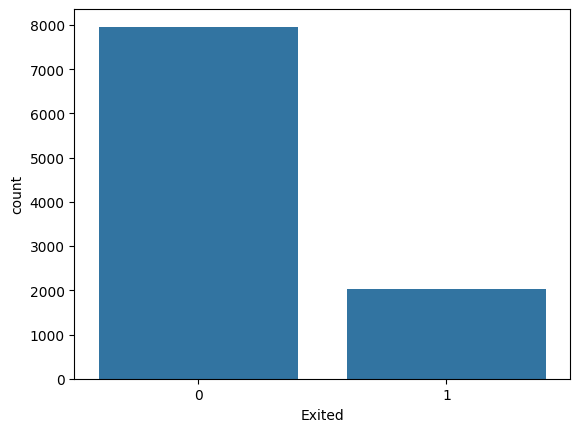

In [17]:
sns.countplot(x = df["Exited"])

<Axes: xlabel='CreditScore', ylabel='Count'>

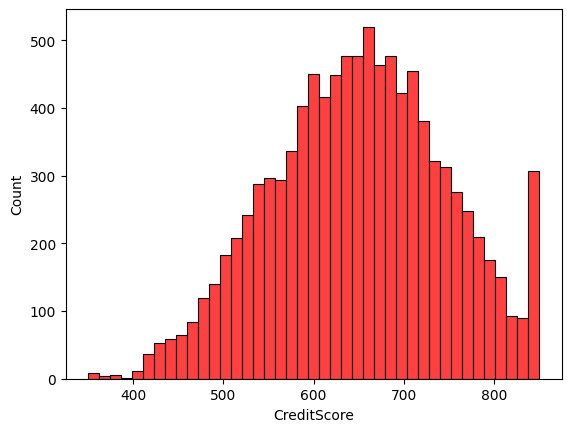

In [18]:
sns.histplot(x = df["CreditScore"], color = "red")

<Axes: xlabel='Gender', ylabel='count'>

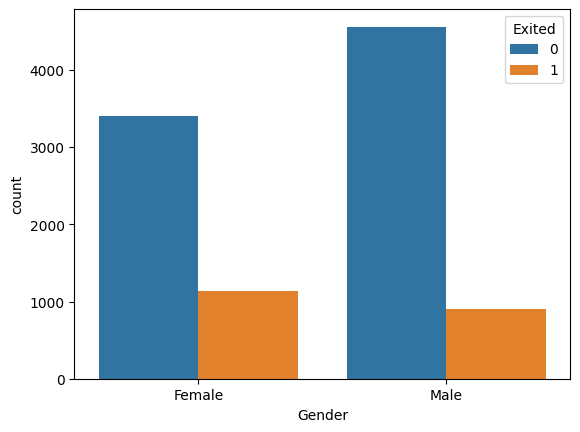

In [19]:
sns.countplot(x = df["Gender"], hue = df["Exited"])

<Axes: xlabel='Geography', ylabel='count'>

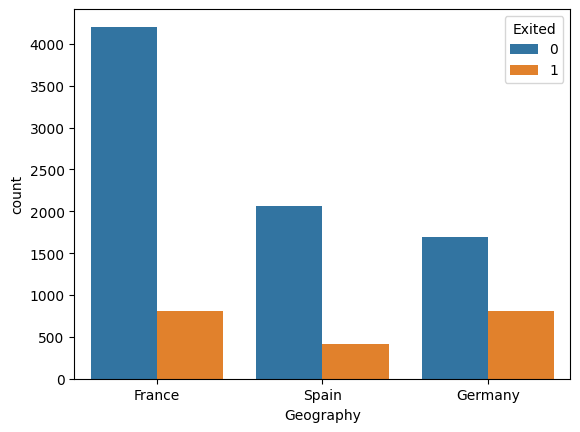

In [20]:
sns.countplot(x = df["Geography"], hue = df["Exited"])

<Axes: ylabel='Age'>

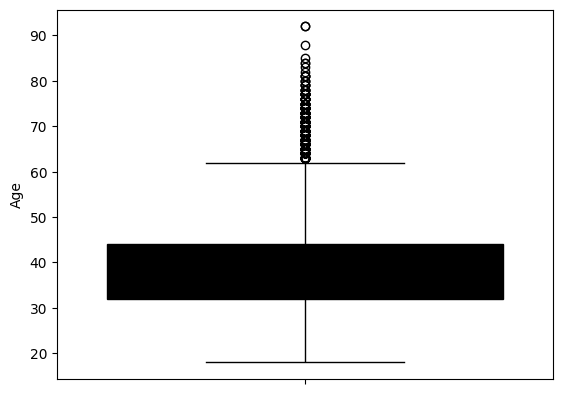

In [21]:
sns.boxplot(df["Age"], color = "black")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


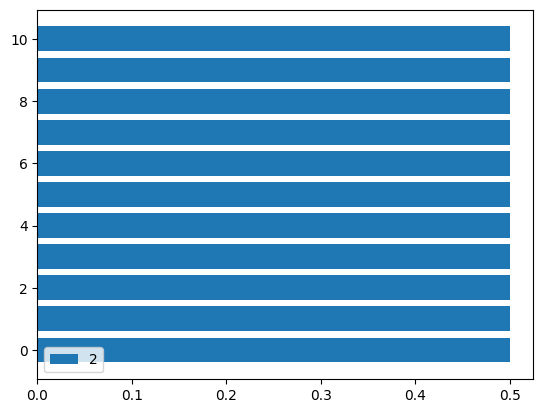

In [22]:
plt.barh( y = df["Tenure"], width = 0.5)
plt.legend(df["Tenure"])
plt.show()

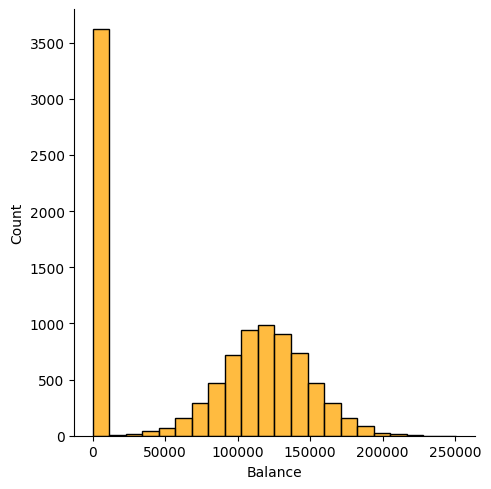

In [23]:
sns.displot(df["Balance"], color = "orange")

<Axes: xlabel='NumOfProducts', ylabel='count'>

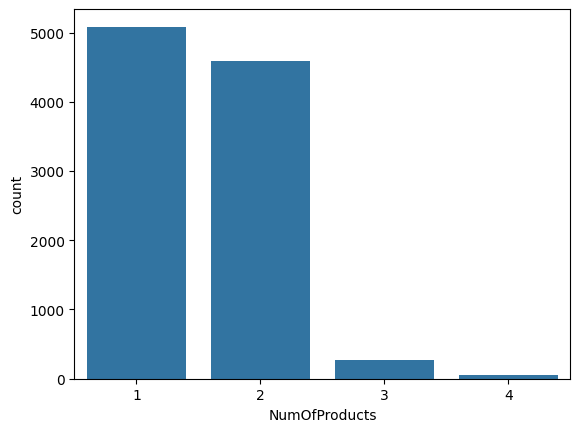

In [24]:
sns.countplot(x = df["NumOfProducts"])

In [25]:
df["HasCrCard"].unique()

array([1, 0])

<Axes: xlabel='HasCrCard', ylabel='count'>

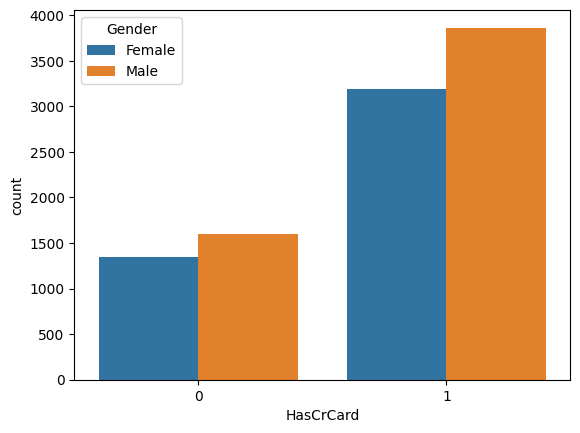

In [26]:
sns.countplot(x = df["HasCrCard"], hue = df["Gender"])

<Axes: xlabel='IsActiveMember', ylabel='count'>

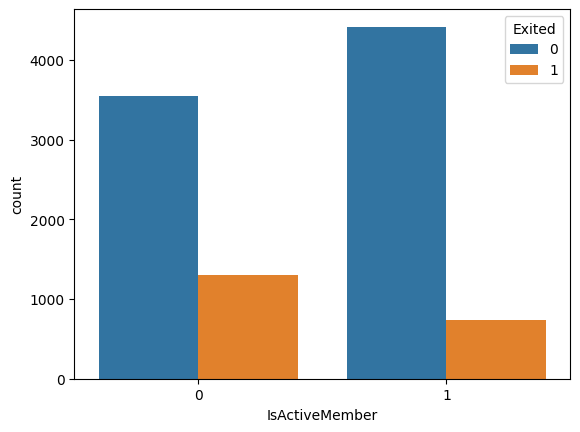

In [27]:
sns.countplot(x = df["IsActiveMember"], hue = df["Exited"])

<Figure size 50000x15000 with 0 Axes>

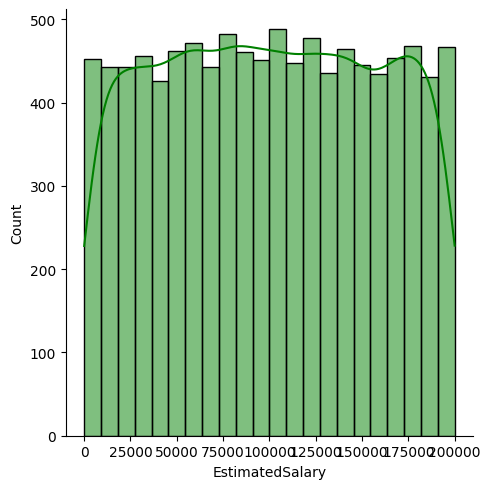

In [28]:
plt.figure(figsize=(500,150))
sns.displot(df["EstimatedSalary"], color = "green", kde = True)

<Axes: xlabel='CreditScore', ylabel='Age'>

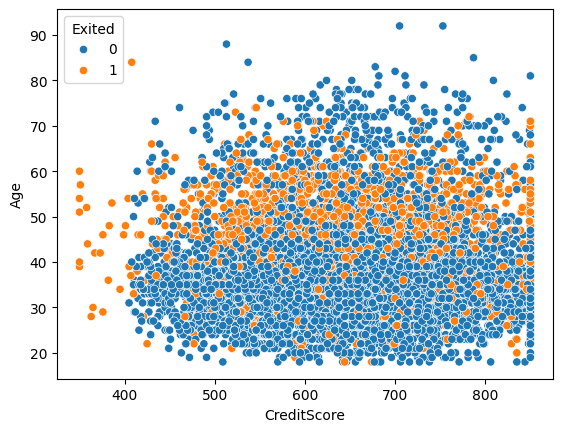

In [29]:
sns.scatterplot(x = df["CreditScore"], y = df["Age"], hue = df["Exited"])

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

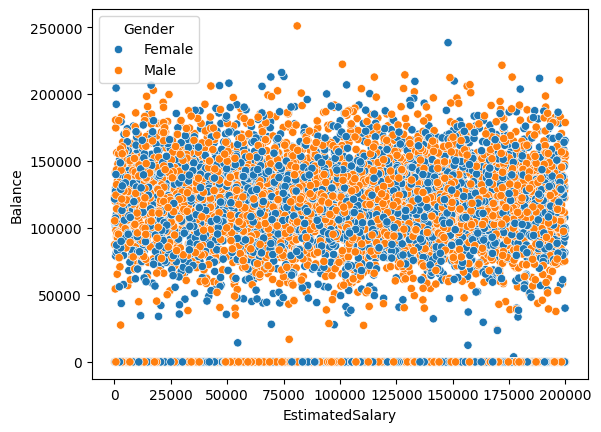

In [30]:
sns.scatterplot(x=df["EstimatedSalary"], y=df["Balance"], hue = df["Gender"])

In [31]:
df[["CreditScore",	"Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


<Axes: >

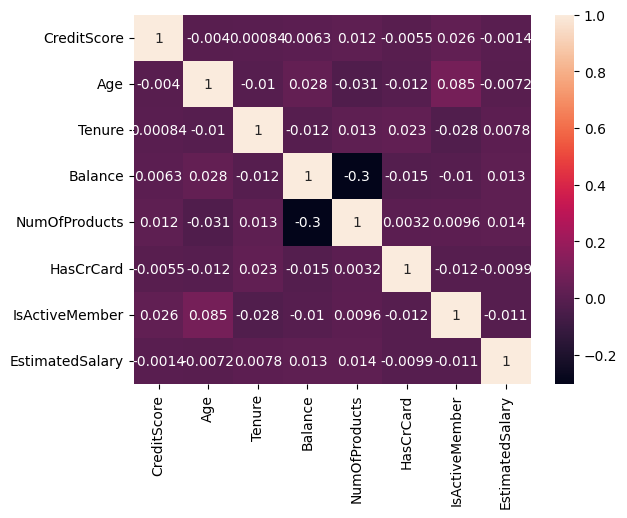

In [32]:
sns.heatmap(df[["CreditScore",	"Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]].corr(), annot = True)

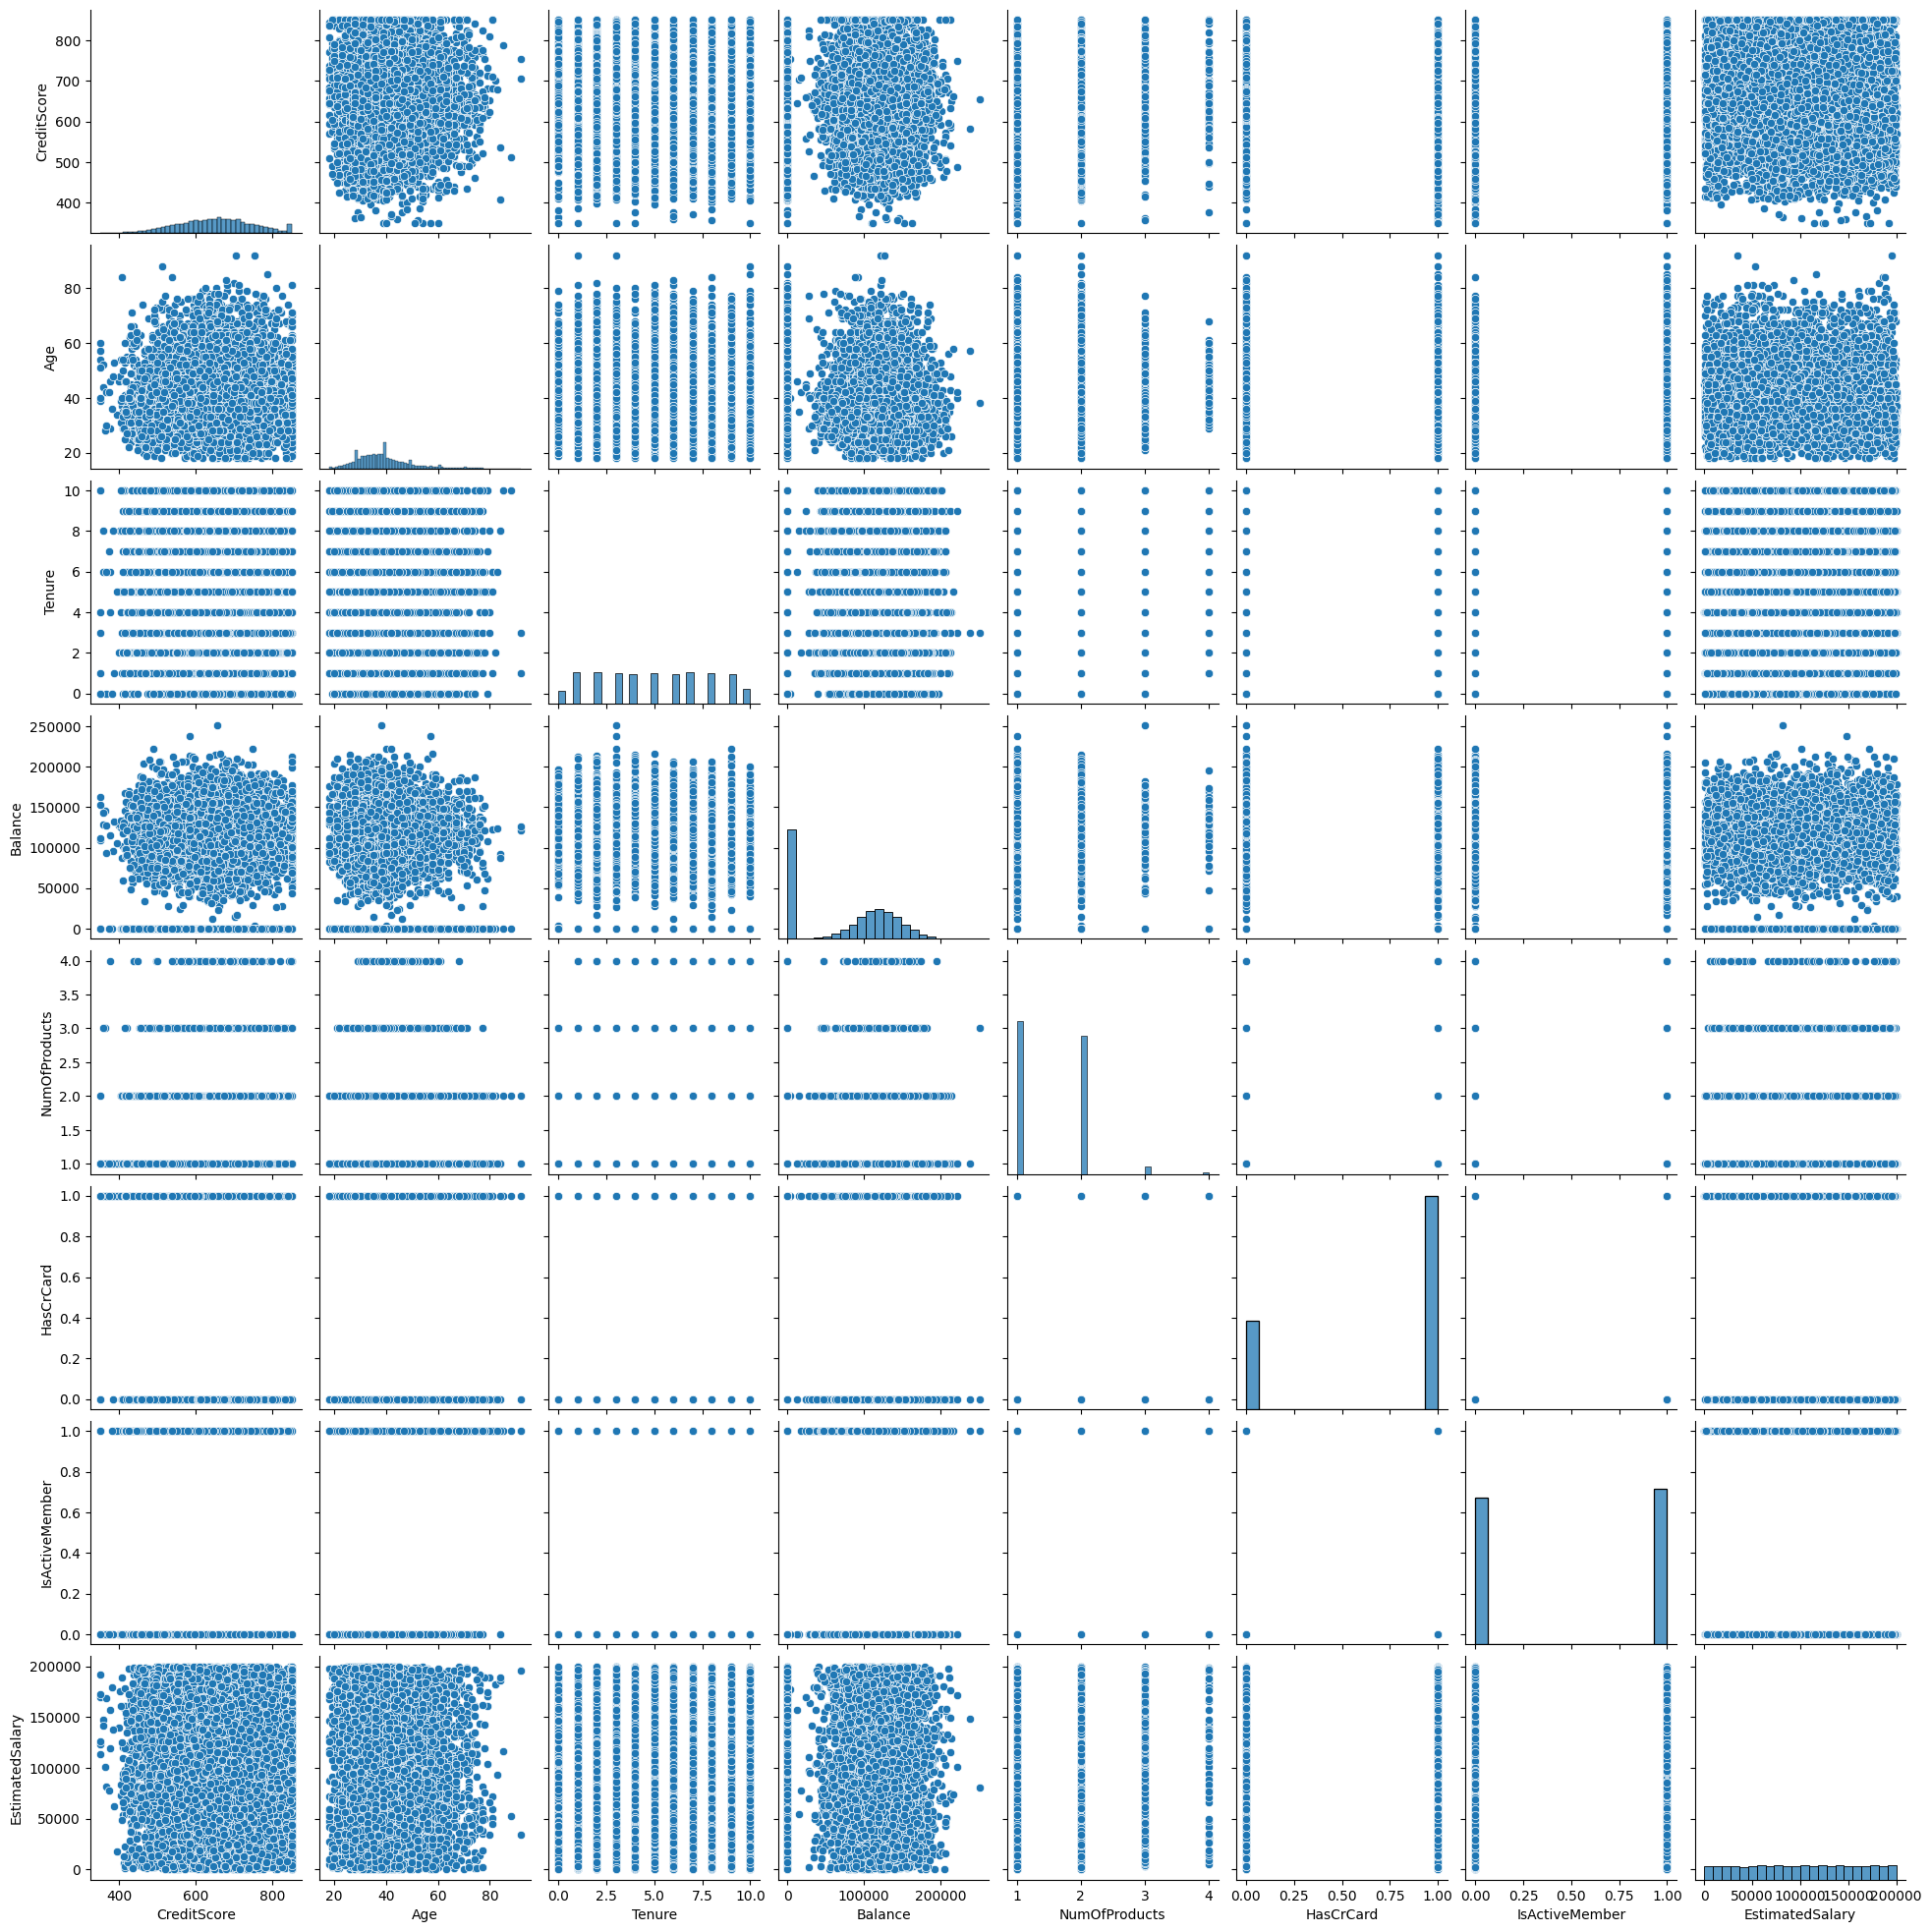

In [33]:
sns.pairplot(df[["CreditScore",	"Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

fit(), transform(), fit_transform()

Xnew = (Xold - Xmean) / std

Xnew = (Xold - Xmin) / (Xmax - Xmin)

In [35]:
df["Age"] = (df["Age"] - df["Age"].mean()) / df["Age"].std()
df["Age"]

,Age
0,0.293503
1,0.198154
2,0.293503
3,0.007456
4,0.388852
...,...
9995,0.007456
9996,-0.373939
9997,-0.278590
9998,0.293503


In [36]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building by ANN (Artificial Neural Network)

In [37]:
# initializing the ANN

ann = tf.keras.models.Sequential()
ann

<Sequential name=sequential, built=False>

In [38]:
# add input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=8, activation='elu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [39]:
# adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Model Training by ANN (Artificial Neural Network)

In [40]:
# compiling ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# train the ANN

ann_model = ann.fit(x_train, y_train, batch_size = 32, epochs=100)  # epoch - 1 forward propogation, calculating loss, send it through backward propogation to update the parameters)
ann_model

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5003 - loss: 0.7318
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.5083
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4637
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8132 - loss: 0.4338
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 0.4198
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8258 - loss: 0.4029
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.3960
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8424 - loss: 0.3707
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.3600
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: 0.3565
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3462
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [42]:
type(ann_model)

keras.src.callbacks.history.History

In [43]:
dir(ann_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [44]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 6)                │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 8)                │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 6)                │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 1)                │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 587 (2.30 KB)

 Trainable params: 195 (780.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 392 (1.54 KB)

In [45]:
ann_model.history

{'accuracy': [0.6660000085830688,
  0.7981250286102295,
  0.8004999756813049,
  0.812624990940094,
  0.8193749785423279,
  0.8302500247955322,
  0.8376250267028809,
  0.8462499976158142,
  0.8511250019073486,
  0.8554999828338623,
  0.8552500009536743,
  0.8573750257492065,
  0.8579999804496765,
  0.8583750128746033,
  0.859250009059906,
  0.8606250286102295,
  0.8616250157356262,
  0.859125018119812,
  0.8606250286102295,
  0.859624981880188,
  0.859749972820282,
  0.8610000014305115,
  0.859499990940094,
  0.8601250052452087,
  0.8611249923706055,
  0.859749972820282,
  0.8621249794960022,
  0.8607500195503235,
  0.8618749976158142,
  0.8618749976158142,
  0.8607500195503235,
  0.8606250286102295,
  0.8615000247955322,
  0.8613749742507935,
  0.8616250157356262,
  0.8612499833106995,
  0.8617500066757202,
  0.8629999756813049,
  0.8628749847412109,
  0.8612499833106995,
  0.8636249899864197,
  0.8621249794960022,
  0.8610000014305115,
  0.8629999756813049,
  0.8618749976158142,
  0.8

In [46]:
ann_history_keys = ann_model.history.keys()
ann_history_keys

dict_keys(['accuracy', 'loss'])

In [47]:
epochs = ann_model.epoch
epochs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

<Axes: >

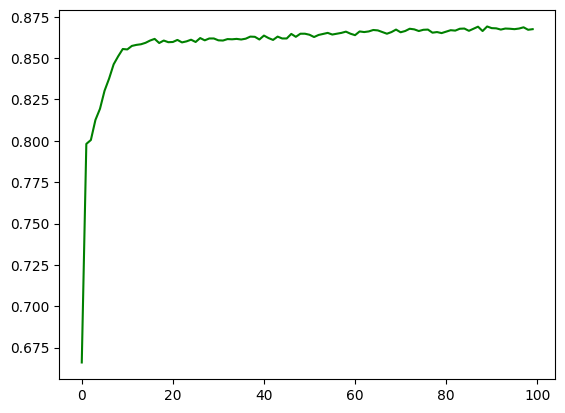

In [48]:
sns.lineplot(x = epochs, y = ann_model.history['accuracy'], color = "green")


<Axes: >

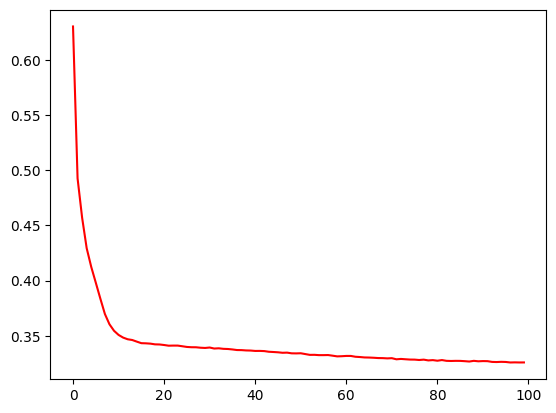

In [49]:
sns.lineplot(x = epochs, y = ann_model.history['loss'], color = 'red')

In [50]:
def plot_loss_accuracy(model, history_keys):
  epoch = ann_model.epoch
  ann_history_keys = ann_model.history.keys()

  train_data = ann_model.history.get(history_keys)
  test_data = ann_model.history.get(history_keys)

  plt.figure(figsize=(20,7))
  sns.lineplot(x = epoch, y = train_data, color = "black")
  sns.lineplot(x = epoch, y = test_data, color = "orange")
  plt.title(history_keys)
  plt.xlabel("epochs")
  plt.ylabel(history_keys)
  plt.show()

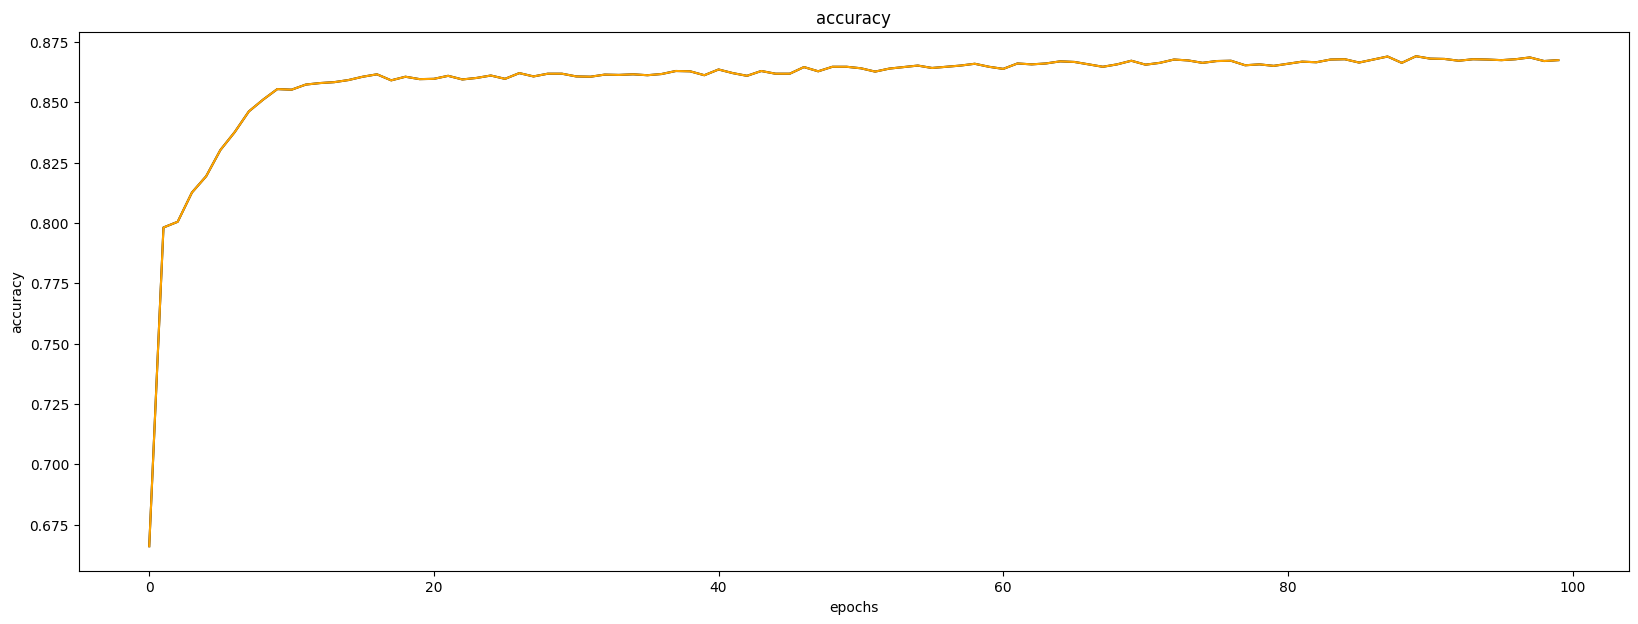

In [51]:
plot_loss_accuracy(ann_model, "accuracy")

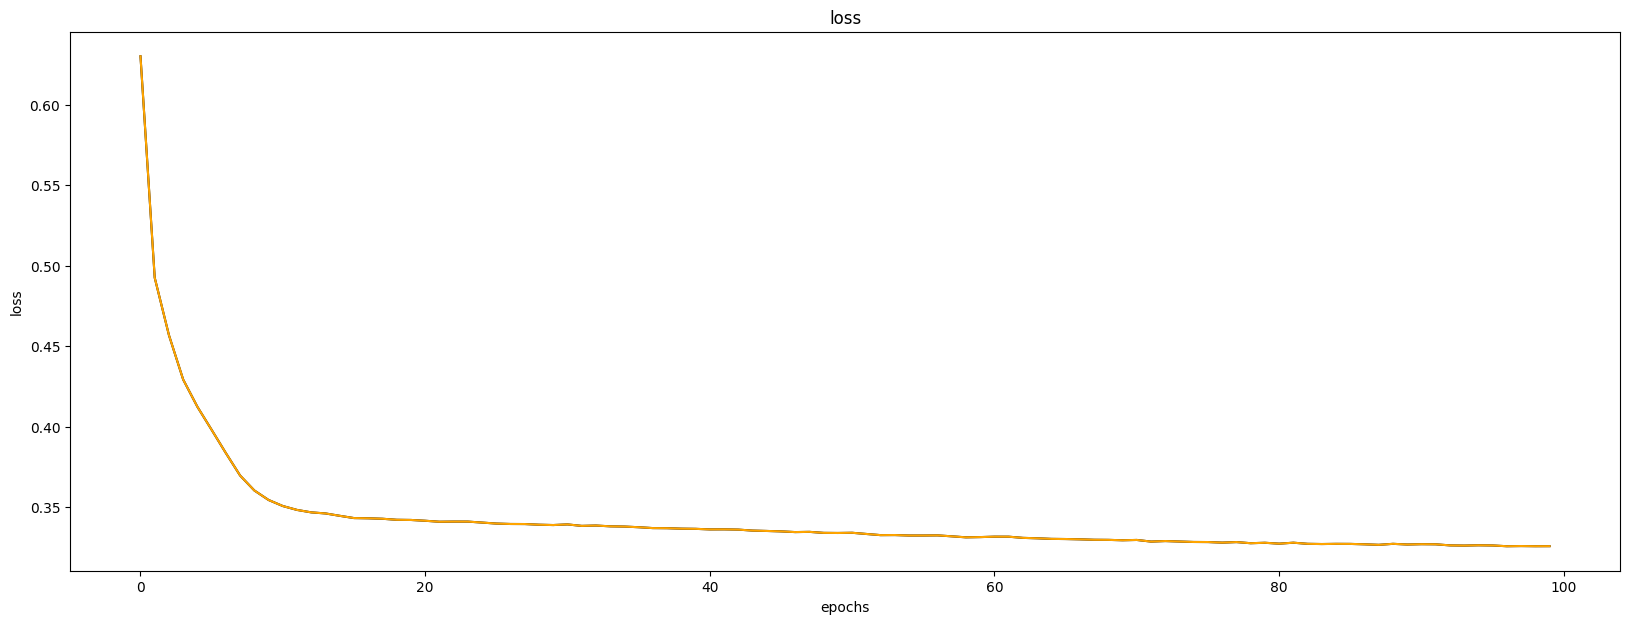

In [52]:
plot_loss_accuracy(ann_model, "loss")

# model evaluation

In [53]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [54]:
ytrain_pred = ann.predict(x_train)
ytrain_pred

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.70841914],
       [0.14570585],
       [0.02939026],
       ...,
       [0.21933103],
       [0.13521492],
       [0.36031318]], dtype=float32)

In [55]:
ytrain_pred = ann.predict(x_train)

ytrain_pred_list = []

for i in ytrain_pred:
  if i > 0.5:
    ytrain_pred_list.append(1)
  else:
    ytrain_pred_list.append(0)

ytrain_pred_list = np.array(ytrain_pred_list)
ytrain_pred_list

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([1, 0, 0, ..., 0, 0, 0])

In [56]:
accuracy_score(y_train, ytrain_pred_list)

0.868875

In [57]:
conf_mat = confusion_matrix(y_train, ytrain_pred_list)
conf_mat

array([[6195,  190],
       [ 859,  756]])

<Axes: >

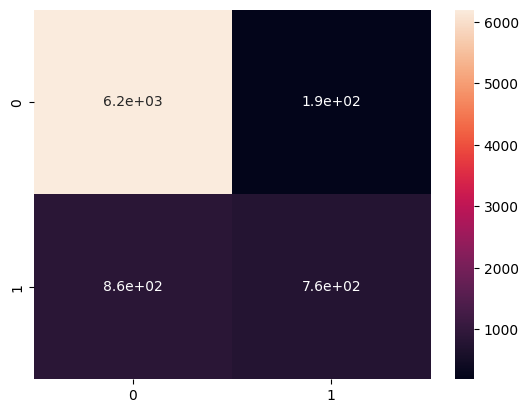

In [58]:
sns.heatmap(conf_mat, annot=True)

# make predictions

In [59]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,0.007456,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,-0.373939,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,-0.278590,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,0.293503,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,-1.041381,4,130142.79,1,1,0,38190.78,0


Geography
CreditScore
Gender	- F : 0, M : 1
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary

619	France	Female	42	2	0.00	1	1	1	101348.88

sigmoid function - always returns probability 0 to 1

p(y) = 1 / (1+e^(-1))

Threshould = 0.5

pred > th : output class1
pred <= th : output class0

In [60]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,0.293503,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,0.198154,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,0.293503,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,0.007456,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,0.388852,2,125510.82,1,1,1,79084.10,0


In [61]:
x[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [62]:
ann.predict(sc.transform([[1, 0, 0,619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[0.32440868]], dtype=float32)

In [63]:
def ChurnPrediction(Geography_France ,	Geography_Germany, Geography_Spain,  CreditScore, Gender,	Age,	Tenure,	Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary):
  input_data = sc.transform([[Geography_France ,Geography_Germany,	Geography_Spain, CreditScore, Gender,	Age,	Tenure,	Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary]])
  prediction = ann.predict(input_data)

  if prediction > 0.5 :
    print("Customer will leave the bank")
  else:
    print("Customer will not leave the bank")

In [64]:
ChurnPrediction(0,1,0,	608, 0,	41,	1,	83807.86,	1,	0,	1,	112542.58)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Customer will not leave the bank


In [65]:
# 772	Germany	Male	42	3	75075.31	2	1	0 92888.52

ChurnPrediction(0,1,0,	772, 1,	42,	3,	75075.31,	2,	1,	1,	92888.52)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Customer will not leave the bank


In [66]:
ChurnPrediction(1,0,0,	800, 1,	35,	2,	50000,	2,	1,	1,	100000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Customer will not leave the bank
